In [31]:
import pandas as pd
import luxpy as lx # package for color science calculations 
# print('Luxpy version: ',lx.__VERSION__)
# version: v1.9.6
import numpy as np # fundamental package for scientific computing 
import matplotlib.pyplot as plt # package for plotting

In [34]:
# get data
spdData = pd.read_csv('./data/spectrums.txt', sep=' |:', header=None, engine='python')
spdData.columns = ['Light','Channel','Value']
spdData['Luminance'] = spdData.apply(lambda x: float(lx.spd_to_power(eval(x['Value']), ptype='pu')), axis=1)
# spd_to_power(): spectral radiant power [W/nm] to luminance [cd/m^2]

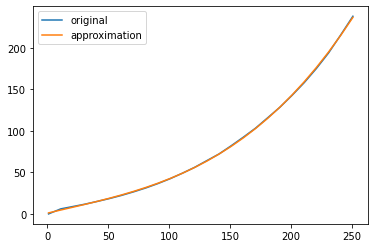

In [33]:
# Approximation
def getApproximation(x, y, n):
    apx = np.polyfit(x, y, n)
    y_apx = np.poly1d(apx)(x)
    return (x, y_apx)

channel = 1
x = range(1,256,10)
y = spdData['Luminance'][spdData['Light']==channel]
x, y_apx = getApproximation(x, y, 3)

plt.plot(x, y, label='original')
plt.plot(x, y_apx, label='approximation')
plt.legend()
plt.show()